In [3]:
import sys
sys.path.append("../")
from models.builder import EncoderDecoder as segmodel
from models_CMX.builder import EncoderDecoder as cmxmodel
from model_pytorch_deeplab_xception.deeplab import DeepLab
from models_segformer import SegFormer
from fvcore.nn import FlopCountAnalysis
import importlib
import torch
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

# code\UsefullnessOfDepth\configs\SynthDet\SynthDet_template_DFormer_Tiny.py
config_path = r"..\configs\SynthDet\SynthDet_template_DFormer_Tiny.py"
config_module = importlib.import_module("configs.SynthDet.SynthDet_template_DFormer_Tiny")
config = config_module.config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")   

rgb_input = torch.randn(2, 3, 400, 400).to(device)
depth_input = torch.randn(2, 1, 400, 400).to(device)

config.decoder = "ham"
config.backbone = "DFormer-Tiny"
dformer_tiny_model = segmodel(cfg=config).to(device)
flops = FlopCountAnalysis(dformer_tiny_model, (rgb_input, depth_input))
num_params = sum(p.numel() for p in dformer_tiny_model.parameters() if p.requires_grad)
print("Dformer tiny flops: ", flops.total())
print("DFormer Tiny GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("DFormer Tiny params: ", num_params, " in millions: ", num_params / 1e6)

config.decoder = "ham"
config.backbone = "DFormer-Large"
config.drop_path_rate = 0.2
dformer_large_model = segmodel(cfg=config).to(device)
flops = FlopCountAnalysis(dformer_large_model, (rgb_input, depth_input))
num_params = sum(p.numel() for p in dformer_large_model.parameters() if p.requires_grad)
print("Dformer large flops: ", flops.total())
print("DFormer Large GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("DFormer Large params: ", num_params, " in millions: ", num_params / 1e6)

config.decoder = "MLPDecoder"
config.backbone = "mit_b2"
cmxmodel = cmxmodel(cfg=config).to(device)
flops = FlopCountAnalysis(cmxmodel, (rgb_input, depth_input))
num_params = sum(p.numel() for p in cmxmodel.parameters() if p.requires_grad)
print("CMX flops: ", flops.total())
print("CMX GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("CMX params: ", num_params, " in millions: ", num_params / 1e6)
    
config.backbone = "xception"
deeplab_model = DeepLab(cfg=config, criterion=nn.CrossEntropyLoss(reduction="none"), norm_layer=nn.BatchNorm2d).to(device)
flops = FlopCountAnalysis(deeplab_model, rgb_input)
num_params = sum(p.numel() for p in deeplab_model.parameters() if p.requires_grad)
print("Deeplab flops: ", flops.total())
print("Deeplab GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("Deeplab params: ", num_params, " in millions: ", num_params / 1e6)

config.backbone = "segformer"
segmenter = SegFormer(backbone="MiT-B0", cfg=config, criterion=nn.CrossEntropyLoss(reduction="none")).to(device)
flops = FlopCountAnalysis(segmenter, rgb_input)
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("Segformer flops: ", flops.total())
print("Segformer GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("Segformer params: ", num_params, " in millions: ", num_params / 1e6)


29 12:41:12 Using Ham Decoder
29 12:41:12 Initing weights ...


single GPU
0.2
64
spatial True
S 1
D 512
R 64
train_steps 6
eval_steps 7
inv_t 100
eta 0.9
rand_init True


29 12:41:12 WRN Unsupported operator aten::add_ encountered 13 time(s)
29 12:41:12 WRN Unsupported operator aten::gelu encountered 40 time(s)
29 12:41:12 WRN Unsupported operator aten::mul encountered 159 time(s)
29 12:41:12 WRN Unsupported operator aten::add encountered 135 time(s)
29 12:41:12 WRN Unsupported operator aten::rand encountered 47 time(s)
29 12:41:12 WRN Unsupported operator aten::div encountered 60 time(s)
29 12:41:12 WRN Unsupported operator aten::pow encountered 10 time(s)
29 12:41:12 WRN Unsupported operator aten::softmax encountered 11 time(s)
29 12:41:12 WRN Unsupported operator aten::linalg_vector_norm encountered 1 time(s)
29 12:41:12 WRN Unsupported operator aten::clamp_min encountered 1 time(s)
29 12:41:12 WRN Unsupported operator aten::expand_as encountered 1 time(s)
29 12:41:12 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
29 12:41:12 WRN The following submodules of the model were never called during the trace of the graph. They may be u

Dformer tiny flops:  15412004992
DFormer Tiny GFLOPs per image:  7.7
DFormer Tiny params:  6016224  in millions:  6.016224
single GPU
0.2
64
spatial True
S 1
D 512
R 64
train_steps 6
eval_steps 7
inv_t 100
eta 0.9
rand_init True


29 12:41:13 WRN Unsupported operator aten::add_ encountered 13 time(s)
29 12:41:13 WRN Unsupported operator aten::gelu encountered 61 time(s)
29 12:41:13 WRN Unsupported operator aten::mul encountered 243 time(s)
29 12:41:13 WRN Unsupported operator aten::add encountered 205 time(s)
29 12:41:13 WRN Unsupported operator aten::rand encountered 75 time(s)
29 12:41:13 WRN Unsupported operator aten::div encountered 88 time(s)
29 12:41:13 WRN Unsupported operator aten::pow encountered 17 time(s)
29 12:41:13 WRN Unsupported operator aten::softmax encountered 18 time(s)
29 12:41:13 WRN Unsupported operator aten::linalg_vector_norm encountered 1 time(s)
29 12:41:13 WRN Unsupported operator aten::clamp_min encountered 1 time(s)
29 12:41:13 WRN Unsupported operator aten::expand_as encountered 1 time(s)
29 12:41:13 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
29 12:41:13 WRN The following submodules of the model were never called during the trace of the graph. They may be u

Dformer large flops:  72376557984
DFormer Large GFLOPs per image:  36.2
DFormer Large params:  39042704  in millions:  39.042704


29 12:41:14 Using MLP Decoder
29 12:41:14 Initing weights ...
29 12:41:15 WRN Unsupported operator aten::mul encountered 132 time(s)
29 12:41:15 WRN Unsupported operator aten::softmax encountered 40 time(s)
29 12:41:15 WRN Unsupported operator aten::add encountered 92 time(s)
29 12:41:15 WRN Unsupported operator aten::gelu encountered 32 time(s)
29 12:41:15 WRN Unsupported operator aten::bernoulli_ encountered 60 time(s)
29 12:41:15 WRN Unsupported operator aten::div_ encountered 60 time(s)
29 12:41:15 WRN Unsupported operator aten::adaptive_max_pool2d encountered 4 time(s)
29 12:41:15 WRN Unsupported operator aten::sigmoid encountered 8 time(s)
29 12:41:15 WRN Unsupported operator aten::add_ encountered 9 time(s)
29 12:41:15 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
29 12:41:15 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python 

CMX flops:  76846170240
CMX GFLOPs per image:  38.4
CMX params:  66587464  in millions:  66.587464


29 12:41:16 WRN Unsupported operator aten::add_ encountered 141 time(s)
29 12:41:16 WRN Unsupported operator aten::pad encountered 63 time(s)
29 12:41:16 WRN Unsupported operator aten::add encountered 20 time(s)
29 12:41:16 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
criterion
29 12:41:16 WRN Unsupported operator aten::mul encountered 22 time(s)


Deeplab flops:  102340281136
Deeplab GFLOPs per image:  51.2
Deeplab params:  54716368  in millions:  54.716368


29 12:41:16 WRN Unsupported operator aten::softmax encountered 8 time(s)
29 12:41:16 WRN Unsupported operator aten::add encountered 30 time(s)
29 12:41:16 WRN Unsupported operator aten::gelu encountered 8 time(s)
29 12:41:16 WRN Unsupported operator aten::rand encountered 14 time(s)
29 12:41:16 WRN Unsupported operator aten::floor_ encountered 14 time(s)
29 12:41:16 WRN Unsupported operator aten::div encountered 14 time(s)
29 12:41:16 WRN Unsupported operator aten::add_ encountered 1 time(s)
29 12:41:16 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
29 12:41:16 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
criterion


Segformer flops:  9499904896
Segformer GFLOPs per image:  4.7
Segformer params:  3730592  in millions:  3.730592


In [9]:
config.backbone = "segformer"
segmenter = SegFormer(backbone="MiT-B1", cfg=config, criterion=nn.CrossEntropyLoss(reduction="none")).to(device)
flops = FlopCountAnalysis(segmenter, rgb_input)
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("Segmenter flops: ", flops.total())
print("Segmenter GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("Segmenter params: ", num_params)

29 09:30:41 WRN Unsupported operator aten::mul encountered 22 time(s)
29 09:30:41 WRN Unsupported operator aten::softmax encountered 8 time(s)
29 09:30:41 WRN Unsupported operator aten::add encountered 30 time(s)
29 09:30:41 WRN Unsupported operator aten::gelu encountered 8 time(s)
29 09:30:41 WRN Unsupported operator aten::rand encountered 14 time(s)
29 09:30:41 WRN Unsupported operator aten::floor_ encountered 14 time(s)
29 09:30:41 WRN Unsupported operator aten::div encountered 14 time(s)
29 09:30:41 WRN Unsupported operator aten::add_ encountered 1 time(s)
29 09:30:41 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
29 09:30:41 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
criterion


Segmenter flops:  17957605120
Segmenter GFLOPs per image:  9.0
Segmenter params:  13682131


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1.9867257 2.3165886
tensor(0.) tensor(1.)


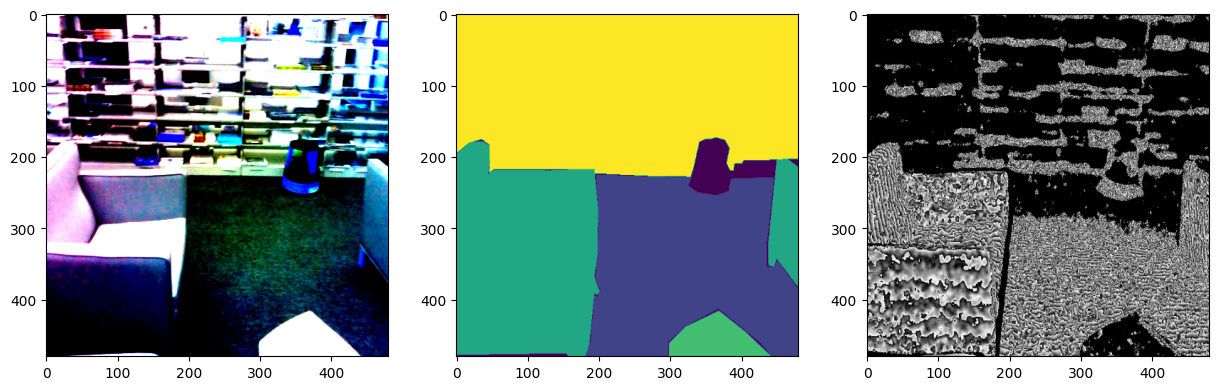

In [1]:
# Utils
import sys
sys.path.append("../")

from utils.dataloader.dataloader import get_train_loader,get_val_loader
from utils.dataloader.RGBXDataset import RGBXDataset
import importlib
import torch
import matplotlib.pyplot as plt

config_path = r"..\configs\SynthDet\SynthDet_template_DFormer_Tiny.py"
config_module = importlib.import_module("configs.SUNRGBD.SUNRGBD_DFormer_Tiny")
config = config_module.config

config.dataset_path = r"..\datasets\SUNRGBD"
config.rgb_root_folder = r"..\datasets\SUNRGBD\RGB"
config.gt_root_folder = r"..\datasets\SUNRGBD\labels"
config.x_root_folder = r"..\datasets\SUNRGBD\Depth"
config.train_source = r"..\datasets\SUNRGBD\train.txt"
config.eval_source = r"..\datasets\SUNRGBD\test.txt"

train_loader, _ = get_train_loader(None, RGBXDataset, config)
val_loader, _ = get_val_loader(None, RGBXDataset, config, 1)

for i, batch in enumerate(train_loader):
    # imgs = minibatch['data']
    #         gts = minibatch['label']
    #         # modal_xs = minibatch['modal_x']
    imgs = batch['data']
    gts = batch['label']
    modal_xs = batch['modal_x'][0]
    # moxal_xs = (modal_xs - modal_xs.min()) / (modal_xs.max() - modal_xs.min())
    modal_xs_np = modal_xs.cpu().numpy()
    print(modal_xs_np.min(), modal_xs_np.max())
    moxal_xs = (modal_xs - modal_xs.min()) / (modal_xs.max() - modal_xs.min())
    print(moxal_xs.min(), moxal_xs.max())
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(imgs[0].permute(1, 2, 0))
    ax[1].imshow(gts[0])
    ax[2].imshow(modal_xs.permute(1, 2, 0).cpu().numpy(), cmap='gray')
    plt.show()

    break
    
